In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"C:\Users\sriva\OneDrive\Desktop\Educational Documents\Smart Bridge Assignment solutions\bank.csv")

In [3]:
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dataset.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["deposit"]=le.fit_transform(dataset["deposit"])

In [7]:
x=dataset.iloc[:,0:16].values

In [8]:
y=dataset.iloc[:,16].values

In [9]:
x

array([[59, 'admin.', 'married', ..., -1, 0, 'unknown'],
       [56, 'admin.', 'married', ..., -1, 0, 'unknown'],
       [41, 'technician', 'married', ..., -1, 0, 'unknown'],
       ...,
       [32, 'technician', 'single', ..., -1, 0, 'unknown'],
       [43, 'technician', 'married', ..., 172, 5, 'failure'],
       [34, 'technician', 'married', ..., -1, 0, 'unknown']], dtype=object)

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
x.shape

(11162, 16)

In [12]:
y.shape

(11162,)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('oh',OneHotEncoder(),[1,2,3,4,6,7,8,10,15])],remainder="passthrough")
x=ct.fit_transform(x)

In [14]:
x

array([[1.0, 0.0, 0.0, ..., 1, -1, 0],
       [1.0, 0.0, 0.0, ..., 1, -1, 0],
       [0.0, 0.0, 0.0, ..., 1, -1, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 2, -1, 0],
       [0.0, 0.0, 0.0, ..., 2, 172, 5],
       [0.0, 0.0, 0.0, ..., 1, -1, 0]], dtype=object)

In [15]:
x.shape

(11162, 51)

In [16]:
x

array([[1.0, 0.0, 0.0, ..., 1, -1, 0],
       [1.0, 0.0, 0.0, ..., 1, -1, 0],
       [0.0, 0.0, 0.0, ..., 1, -1, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 2, -1, 0],
       [0.0, 0.0, 0.0, ..., 2, 172, 5],
       [0.0, 0.0, 0.0, ..., 1, -1, 0]], dtype=object)

In [17]:
dataset.corr()

,age,balance,day,duration,campaign,pdays,previous,deposit
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867
deposit,0.034901,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867,1.000000


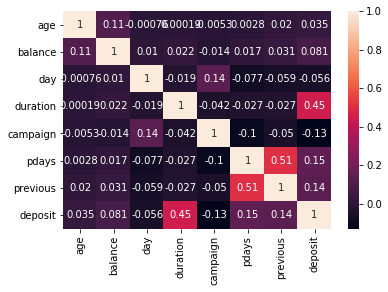

In [18]:
sns.heatmap(dataset.corr(),annot=True)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10000)

In [20]:
x_train

array([[0.0, 0.0, 0.0, ..., 1, -1, 0],
       [0.0, 0.0, 0.0, ..., 30, -1, 0],
       [0.0, 0.0, 0.0, ..., 3, -1, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 4, -1, 0],
       [0.0, 0.0, 0.0, ..., 3, -1, 0],
       [0.0, 1.0, 0.0, ..., 8, -1, 0]], dtype=object)

In [21]:
x_train.shape

(8929, 51)

In [22]:
x_test.shape

(2233, 51)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\sriva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
ypred=logreg.predict(x_test)

In [25]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ypred,y_test)
accuracy

0.8347514554411106

In [28]:
dataset.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1


In [29]:
dataset["poutcome"].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [30]:
logreg.predict([[1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,1000,9,1000,1]])

array([1])